# NETFLIX STOCK MARKET ANALYSIS# 

## About Dataset

The Dataset contains data for 5 years ie. from 5th Feb 2018 to 5th Feb 2022

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.



#### source : Kaggle


#### Author : Santhsoh

##  Models : Linear Regression, Decision Tree, Random Forest

importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


importing Dataset

In [3]:
NFLX_stocks = pd.read_csv("C:/Users/natu/Downloads/NFLX.csv")
NFLX_stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


## Data Preprocessing

In [4]:
NFLX_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
NFLX_stocks.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [6]:
NFLX_stocks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


Removing unwanted column

In [7]:
NFLX_stocks.drop(columns=['Close'], inplace= True)
NFLX_stocks.head()

,Date,Open,High,Low,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


In [8]:
NFLX_stocks.shape

(1009, 6)

In [9]:
NFLX_stocks.columns

Index(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], dtype='object')

In [10]:
NFLX_stocks.describe()

,Open,High,Low,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07


In [11]:
NFLX_stocks.isna().sum()

Date         0
Open         0
High         0
Low          0
Adj Close    0
Volume       0
dtype: int64

In [12]:
NFLX_stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Adj Close    0
Volume       0
dtype: int64

In [13]:
NFLX_stocks.index

RangeIndex(start=0, stop=1009, step=1)

In [14]:
NFLX_stocks.corr()

,Open,High,Low,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,-0.432116
Adj Close,0.996812,0.998551,0.998544,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,1.000000


In [15]:
NFLX_stocks.duplicated().sum()

0

Set Date as index

In [16]:
NFLX_stocks.set_index('Date', inplace=True)
NFLX_stocks.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


Top 5  High Stock price Value in the corresponding Date

In [17]:
stocks = NFLX_stocks.sort_values(by='High',ascending= False).head(5)
stocks['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

Top 5 Low Stock price Value in corresponding  Date

In [19]:
 stocks = NFLX_stocks.sort_values(by='Low',ascending= False).head(5)
stocks['Low']

Date
2021-11-17    686.090027
2021-11-18    679.739990
2021-11-03    677.270020
2021-11-16    676.900024
2021-11-01    676.539978
Name: Low, dtype: float64

# Data Visualization

 To visualize the Stock price with overall period

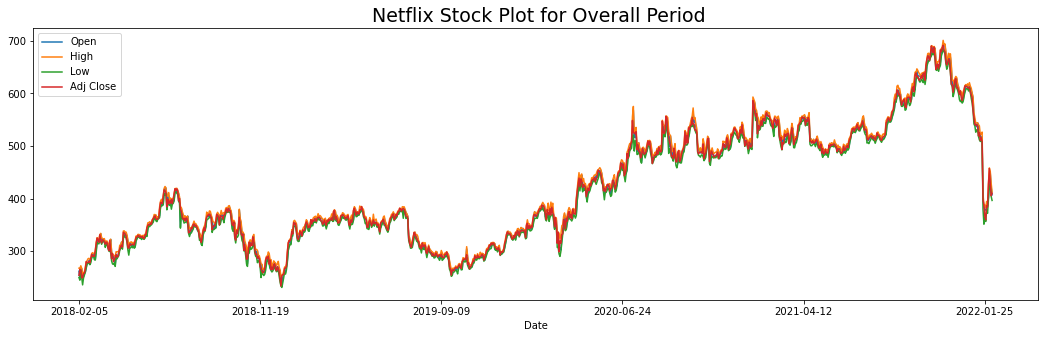

In [20]:
NFLX_stocks[['Open', 'High','Low','Adj Close']].plot(figsize=(18,5))
plt.title(" Netflix Stock Plot for Overall Period", fontsize=19)
plt.show()

Change Price to Close from  year 2018 to 2022

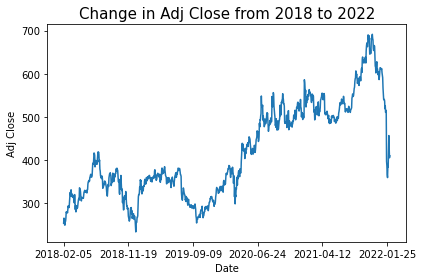

In [21]:
NFLX_stocks['Adj Close'].plot()
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Adj Close',fontsize= 10)
plt.title('Change in Adj Close from 2018 to 2022',fontsize= 15)
plt.tight_layout()

## Method : Linear Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Split the Train and Test Data

In [23]:
x = NFLX_stocks[['Open', 'High', 'Low','Volume']].values
y = NFLX_stocks[['Adj Close']].values

In [24]:
x

array([[2.62000000e+02, 2.67899994e+02, 2.50029999e+02, 1.18961000e+07],
       [2.47699997e+02, 2.66700012e+02, 2.45000000e+02, 1.25958000e+07],
       [2.66579987e+02, 2.72450012e+02, 2.64329987e+02, 8.98150000e+06],
       ...,
       [4.48250000e+02, 4.51980011e+02, 4.26480011e+02, 1.43460000e+07],
       [4.21440002e+02, 4.29260010e+02, 4.04279999e+02, 9.90520000e+06],
       [4.07309998e+02, 4.12769989e+02, 3.96640015e+02, 7.78240000e+06]])

In [25]:
y

array([[254.259995],
       [265.720001],
       [264.559998],
       ...,
       [429.480011],
       [405.600006],
       [410.170013]])

In [26]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
model =  LinearRegression()

model.fit(x_train,y_train)

print(model.coef_)

[[-6.08525352e-01  7.52637059e-01  8.57461003e-01  9.16527847e-08]]


##### Predict the Model

In [30]:
Lr_pred = model.predict(x_test)
print(Lr_pred)

[[553.9710123 ]
 [379.75715499]
 [360.31052939]
 [283.77600754]
 [260.12841761]
 [434.75951257]
 [260.74990787]
 [518.66873943]
 [315.48347691]
 [345.48489762]
 [520.05031298]
 [319.57645542]
 [492.61437106]
 [298.45577973]
 [509.20270074]
 [499.14347163]
 [290.73182569]
 [550.55425666]
 [338.1050594 ]
 [268.88774901]
 [338.98198038]
 [293.36742057]
 [461.44827732]
 [361.95950034]
 [288.38667137]
 [502.66802929]
 [500.35576967]
 [295.64490973]
 [353.29496369]
 [369.09476262]
 [280.44095715]
 [542.32936631]
 [317.56873022]
 [539.36107029]
 [309.9250409 ]
 [519.5780388 ]
 [344.81937045]
 [367.38697797]
 [512.14902109]
 [633.15564047]
 [483.94701584]
 [298.20399113]
 [298.66713838]
 [265.54380772]
 [518.05906843]
 [292.73396801]
 [297.48202484]
 [381.96007664]
 [357.34378049]
 [408.02376354]
 [367.23809342]
 [601.11033304]
 [481.83052369]
 [515.0560907 ]
 [368.23912408]
 [418.10837009]
 [376.20960153]
 [356.89297158]
 [379.6300562 ]
 [357.62789099]
 [291.36418889]
 [499.92180647]
 [491.86

#### Comparing Actual and Predicted Value

In [31]:
Lin_reg = pd.DataFrame({"Actual":y_test.flatten(),"Prediction":Lr_pred.flatten()})
Lin_reg.head()

,Actual,Prediction
0,553.729980,553.971012
1,379.059998,379.757155
2,361.399994,360.310529
3,281.859985,283.776008
4,261.429993,260.128418


<AxesSubplot:>

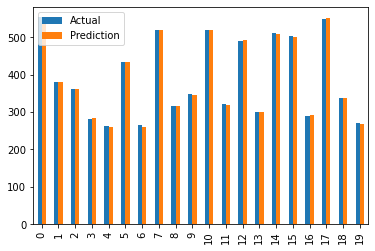

In [32]:
graph = Lin_reg.head(20)
graph.plot(kind='bar')

In [33]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,Lr_pred))


Mean Squared Error: 16.99364846898628


In [34]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,Lr_pred))

Mean Absolute Error: 2.9013198795458575


In [35]:
import math
from sklearn.metrics import mean_squared_error
Root_mean_squared_error = math.sqrt(mean_squared_error(y_test, Lr_pred))
print(Root_mean_squared_error)

4.122335317388226


### Accuuracy Of The Model

In [36]:
from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,Lr_pred))##Goodness of fit test


R2 score:  0.9984917455237636


Here, Our Fitted Model is Good Model

## Method: DecisionTree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)


In [39]:
model =  DecisionTreeRegressor()

model.fit(x_train,y_train)

print(model)

DecisionTreeRegressor()


In [40]:
dt_pred = model.predict(x_test)
print(dt_pred)

[556.52002  381.720001 359.970001 278.549988 264.75     434.26001
 255.570007 508.25     312.279999 348.519989 514.25     321.549988
 489.429993 298.600006 497.519989 501.339996 292.859985 544.530029
 338.019989 264.559998 338.049988 291.559998 457.850006 369.609985
 291.559998 502.359985 501.670013 298.070007 351.769989 368.700012
 278.140015 546.150024 321.549988 539.039978 301.779999 520.799988
 344.5      377.140015 507.019989 628.289978 487.700012 296.779999
 300.940002 265.920013 517.570007 295.350006 302.799988 380.399994
 359.929993 403.829987 368.329987 606.710022 482.880005 520.25
 364.230011 419.600006 373.25     367.649994 390.399994 356.869995
 294.070007 505.869995 491.359985 415.269989 326.26001  503.839996
 507.790009 350.920013 325.220001 338.049988 658.289978 354.640015
 265.920013 269.700012 434.049988 551.340027 354.269989 302.600006
 586.5      363.649994 509.640015 503.839996 522.859985 617.77002
 358.779999 338.619995 398.390015 304.209991 356.269989 521.869995
 

#### Comparing Actual and Predicted Value

In [42]:
Stocks1= pd.DataFrame({"Actual":y_test.flatten(),"Prediction":dt_pred.flatten()})
Stocks1.head()

,Actual,Prediction
0,553.729980,556.520020
1,379.059998,381.720001
2,361.399994,359.970001
3,281.859985,278.549988
4,261.429993,264.750000


<AxesSubplot:>

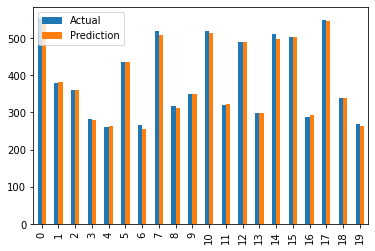

In [43]:
graph = Stocks1.head(20)
graph.plot(kind='bar')

In [44]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,dt_pred))

Mean Squared Error: 42.491545838455046


In [45]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,dt_pred))

Mean Absolute Error: 4.352229029702974


In [46]:
import math
from sklearn.metrics import mean_squared_error
Root_mean_squared_error = math.sqrt(mean_squared_error(y_test, dt_pred))
print(Root_mean_squared_error)

6.518553968362542


##### Predict the Model

In [47]:
from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,dt_pred))##Goodness of fit test


R2 score:  0.9962287048405164


Here, Our Fitted Model is Good Model

## Method: Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)


In [49]:
model =  RandomForestRegressor()

model.fit(x_train,y_train)

print(model)

C:\Users\natu\AppData\Local\Temp/ipykernel_2600/981289230.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestRegressor()


In [50]:
rf_pred = model.predict(x_test)
print(rf_pred)

[554.25051412 380.29209785 361.12050101 281.89499346 261.87949894
 434.76259727 255.17199883 513.08929507 315.76199933 347.54739895
 516.84749759 319.27990016 492.83490095 297.04230139 509.35159696
 497.60319297 290.64689266 547.36931451 335.81019414 266.05209951
 335.88409482 292.95209783 459.14610612 362.67080111 290.69569863
 501.31608896 499.34780395 297.77550085 352.2717984  368.31879338
 279.78609819 537.40171064 318.10299446 537.010003   305.55459991
 520.87639905 342.13320148 376.75040046 507.35709404 634.68308422
 485.38250266 297.42050143 300.56069723 267.83310139 518.45739351
 290.87900146 296.23850024 380.66079898 358.72359654 410.43499773
 368.40689464 607.12829358 481.94720216 514.29650124 364.51350027
 416.90160242 376.7741965  355.85139978 380.97110046 358.96669971
 293.7441994  503.00579453 488.02699787 414.0387943  327.30190298
 501.71729344 504.25050346 349.47789301 323.21329889 337.28179607
 656.35939695 353.15970133 267.68390301 267.6963025  429.56549695
 548.71591

#### Comparing Actual and Predicted Value

In [51]:
Stocks2 = pd.DataFrame({"Actual":y_test.flatten(),"Prediction":rf_pred.flatten()})
Stocks2.head()

,Actual,Prediction
0,553.729980,554.250514
1,379.059998,380.292098
2,361.399994,361.120501
3,281.859985,281.894993
4,261.429993,261.879499


<AxesSubplot:>

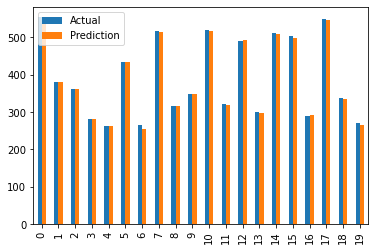

In [52]:
graph = Stocks2.head(20)
graph.plot(kind='bar')

In [53]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,rf_pred))

Mean Squared Error: 28.158419956175138


In [54]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,rf_pred))

Mean Absolute Error: 3.7325643623267415


In [55]:
import math
from sklearn.metrics import mean_squared_error
Root_mean_squared_error = math.sqrt(mean_squared_error(y_test, rf_pred))
print(Root_mean_squared_error)

5.306450787124586


##### Accuracy of the Model

In [56]:
from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,rf_pred))##Goodness of fit test


R2 score:  0.9975008272637772


#### Conclusion

Here the analysis of the dataset "Netflix_Stock_Price" was done.The dataset was downloaded from kaggle which consists of Everyday price,Price at which stock opened,Today's High,Today's Low,Close price adjusted for splits,Adjusted close price adjusted for splits and dividend and/or capital gain distributions,Volume of Stocks etc.The attempt was to use various regression models to predict the price of the stocks.Here R2 score (coefficient of Determination) and Mean Squared Error(MSE)are used to evaluate and compare the performance of regressors. The following Results are

             1) Linear Regression: R2 Score: 0.9984917455237636, MSE:16.99364846898628
   
              2) DecisionTree Regression: R2 Score: 0.9962287048405164, MSE:42.491545838455046
   
               3) RandomForest Regression: R2 Score: 0.9975008272637772, MSE:28.158419956175138
   

#### Looking at the above results, it can be concluded that Linear Regression Model is recommended as it will give a better Performance compared to other models.